<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>8. LOGISTIC REGRESSION</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>EXPLORATORY DATA ANALYSIS ON A DATASET</b></u>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 1. Data Exploration:

In [2]:
##a. Load the dataset and perform exploratory data analysis (EDA).

test_df=pd.read_csv("Titanic_test.csv")
train_df=pd.read_csv("Titanic_train.csv")

test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [3]:
print('Test data shape:',test_df.shape)
print('Train data shape:',train_df.shape)


Test data shape: (418, 11)
Train data shape: (891, 12)


In [4]:
print('Test data head:\n',test_df.head)
print('Train data head:\n',train_df.head)

Test data head:
 <bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Ca

In [5]:
print('test data missing:',test_df.isnull().sum())
print('train data missing:',train_df.isnull().sum())

test data missing: PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
train data missing: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print('Datatype Of test_data',test_df.dtypes)
print('Datatype Of train_data',train_df.dtypes)


Datatype Of test_data PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Datatype Of train_data PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
numerical_cols=train_df.select_dtypes(include=['int64','float64']).columns
categorical_cols=train_df.select_dtypes(include=['category','object']).columns
                                     

In [8]:
print('Numerical columns of train data',list(numerical_cols))
print('Categorical columns of train data',list(categorical_cols))


Numerical columns of train data ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns of train data ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [9]:
#print('Summary:\n',test_df[numerical_cols].describe())
#print('Summary:\n',train_df[categorical_cols].describe())

# 5. Detect Possible Target Column (present in train but not in test)
possible_targets = list(set(train_df.columns) - set(test_df.columns))
target_col = possible_targets[0] if possible_targets else None
print("\nDetected Target Column:", target_col)

numerical_cols_train = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_train = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

if target_col in numerical_cols_train:
    numerical_cols_train.remove(target_col)

numerical_cols_test = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_test = test_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumerical Columns in TRAIN:", numerical_cols_train)
print("Categorical Columns in TRAIN:", categorical_cols_train)


Detected Target Column: Survived

Numerical Columns in TRAIN: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns in TRAIN: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [10]:
print('Statistical Summary of numerical_cols_train\n',train_df[numerical_cols_train].describe())
print('Statistical Summary of categorical_cols_train\n',train_df[categorical_cols_train].describe())

Statistical Summary of numerical_cols_train
        PassengerId      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Statistical Summary of categorical_cols_train
                            Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top  

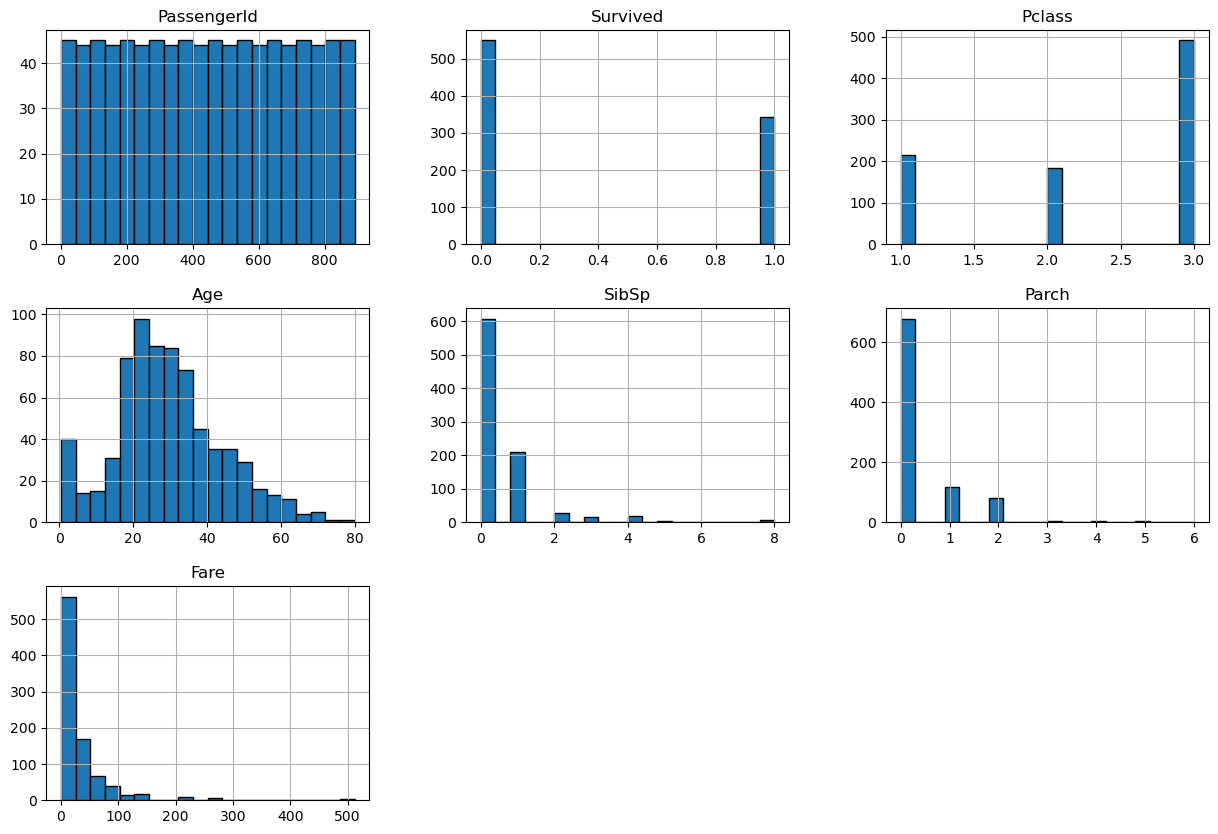

In [11]:
#Histogram
train_df[numerical_cols].hist(figsize=(15,10),bins=20, edgecolor='black')
plt.title('Histogram of Numerical features:')
plt.show()


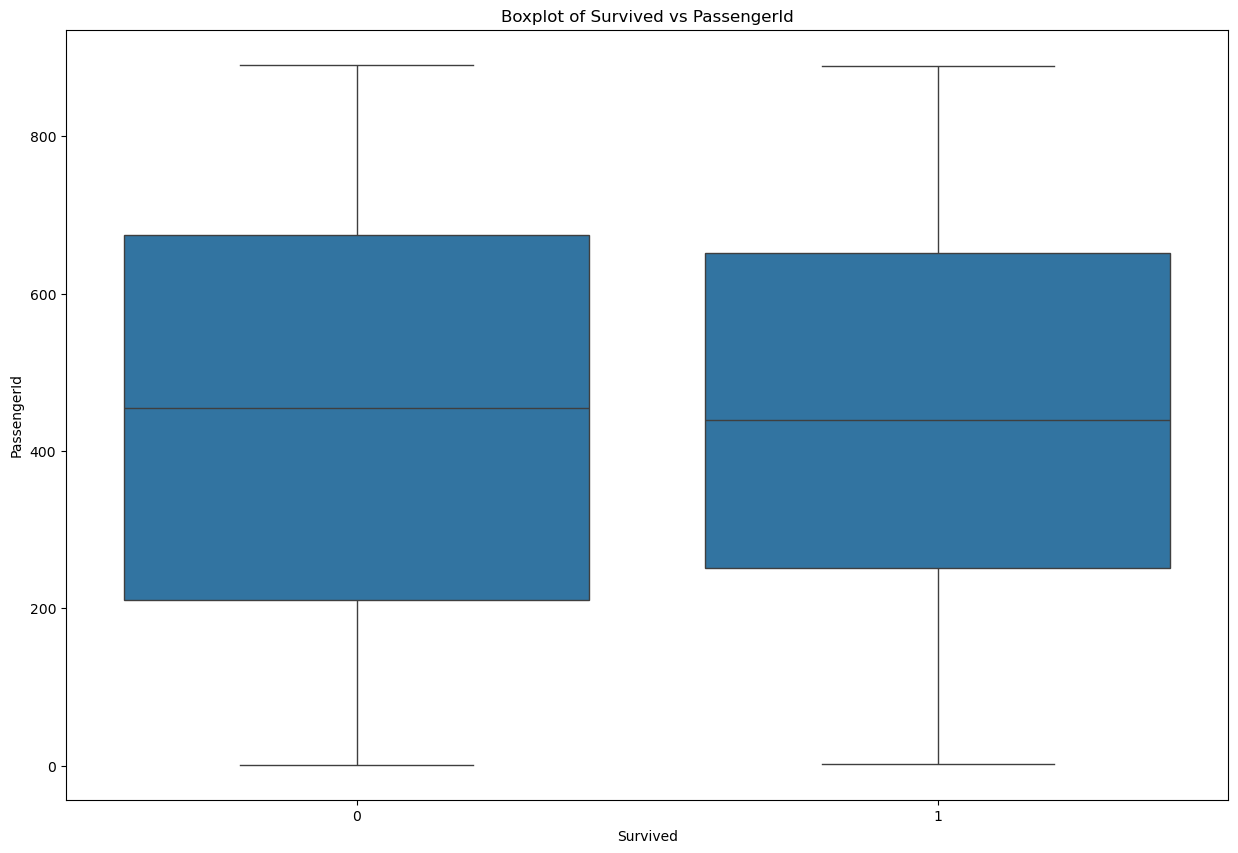

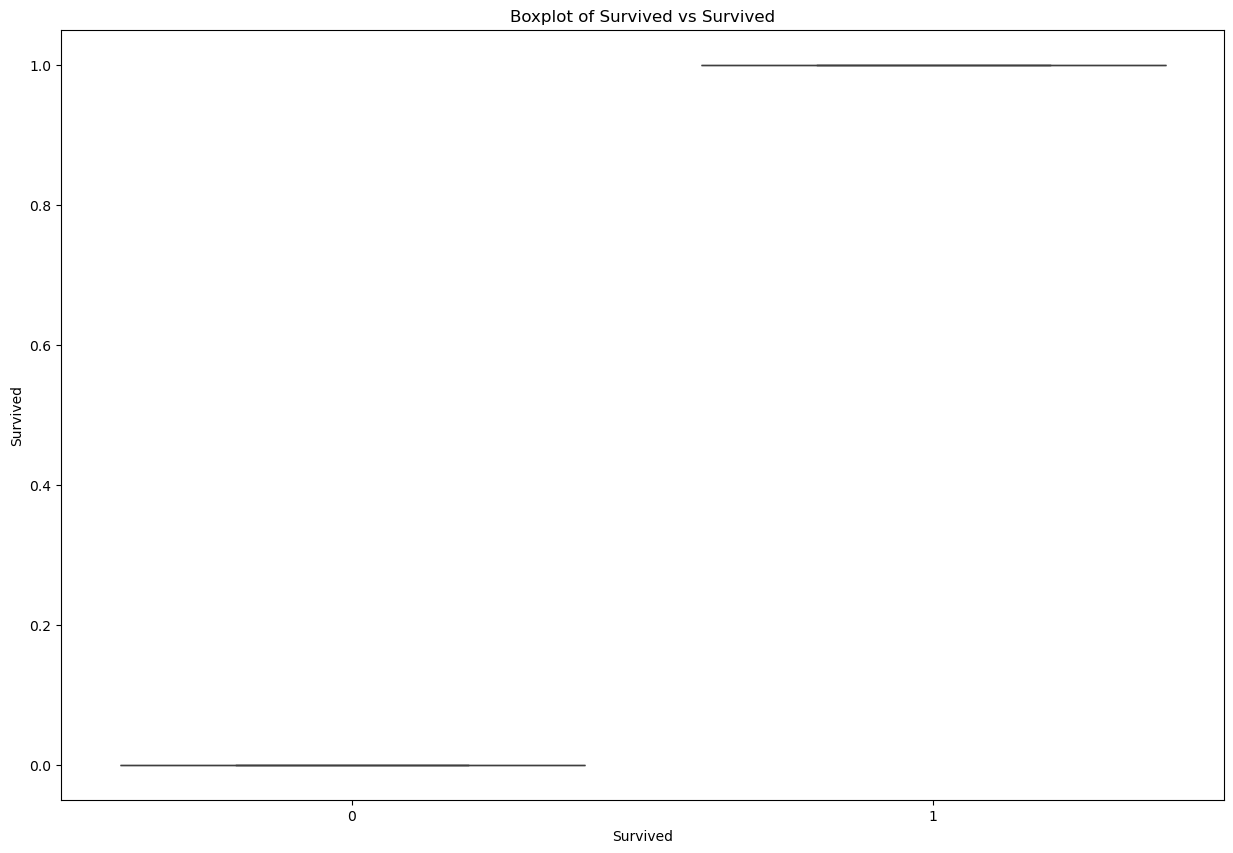

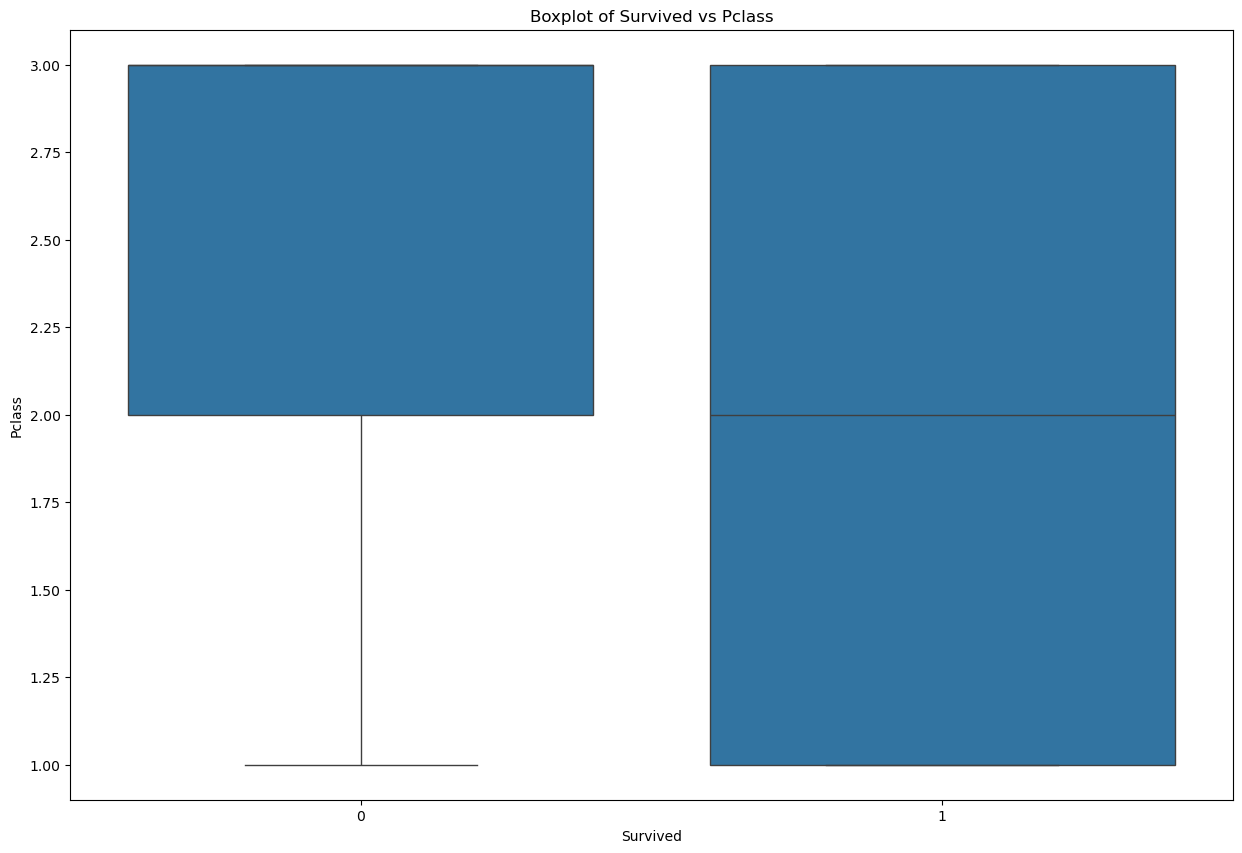

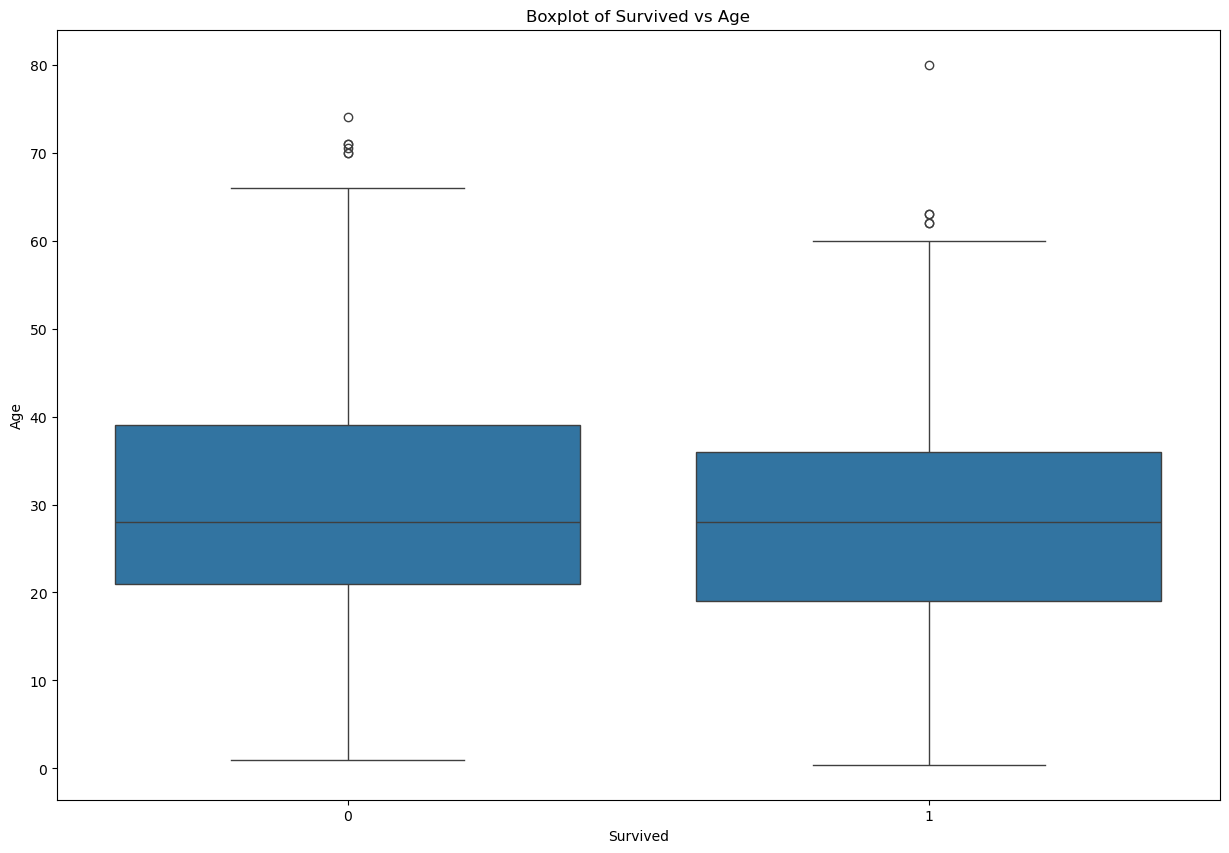

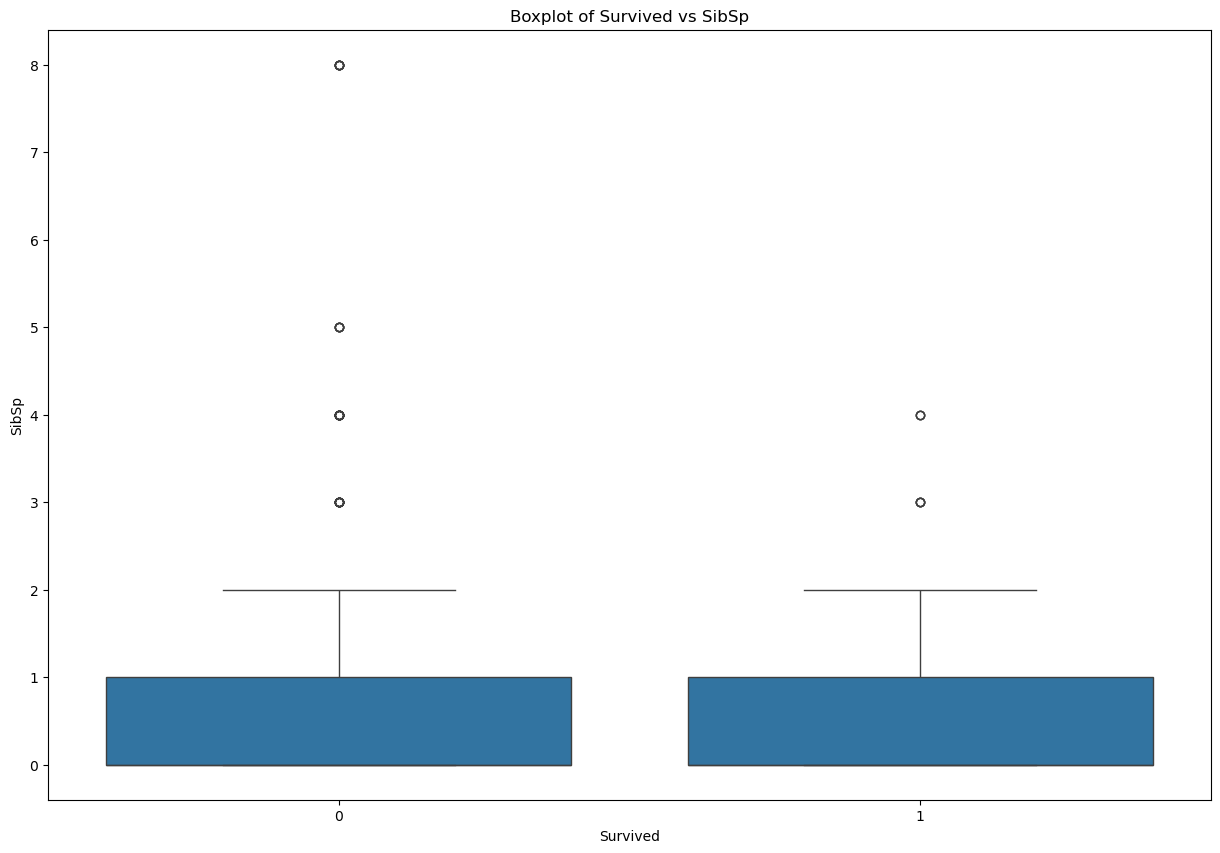

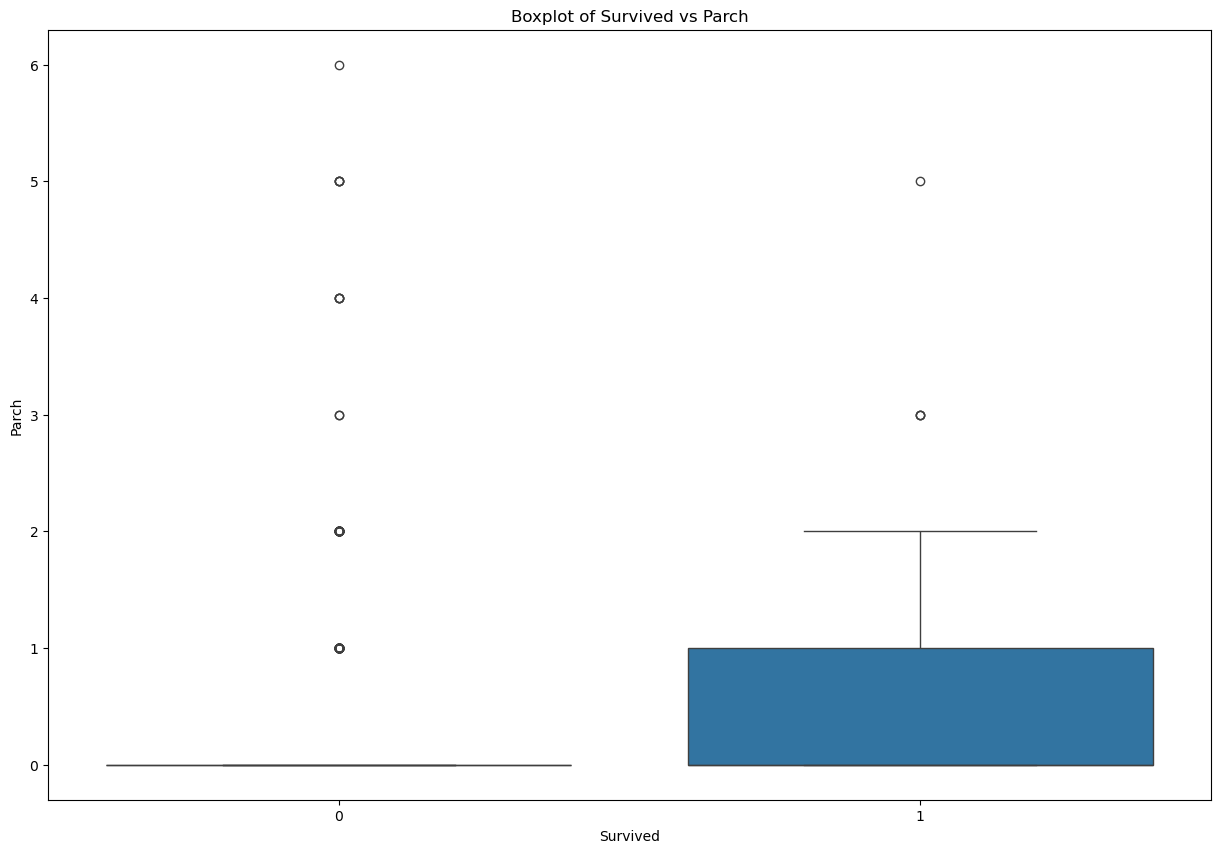

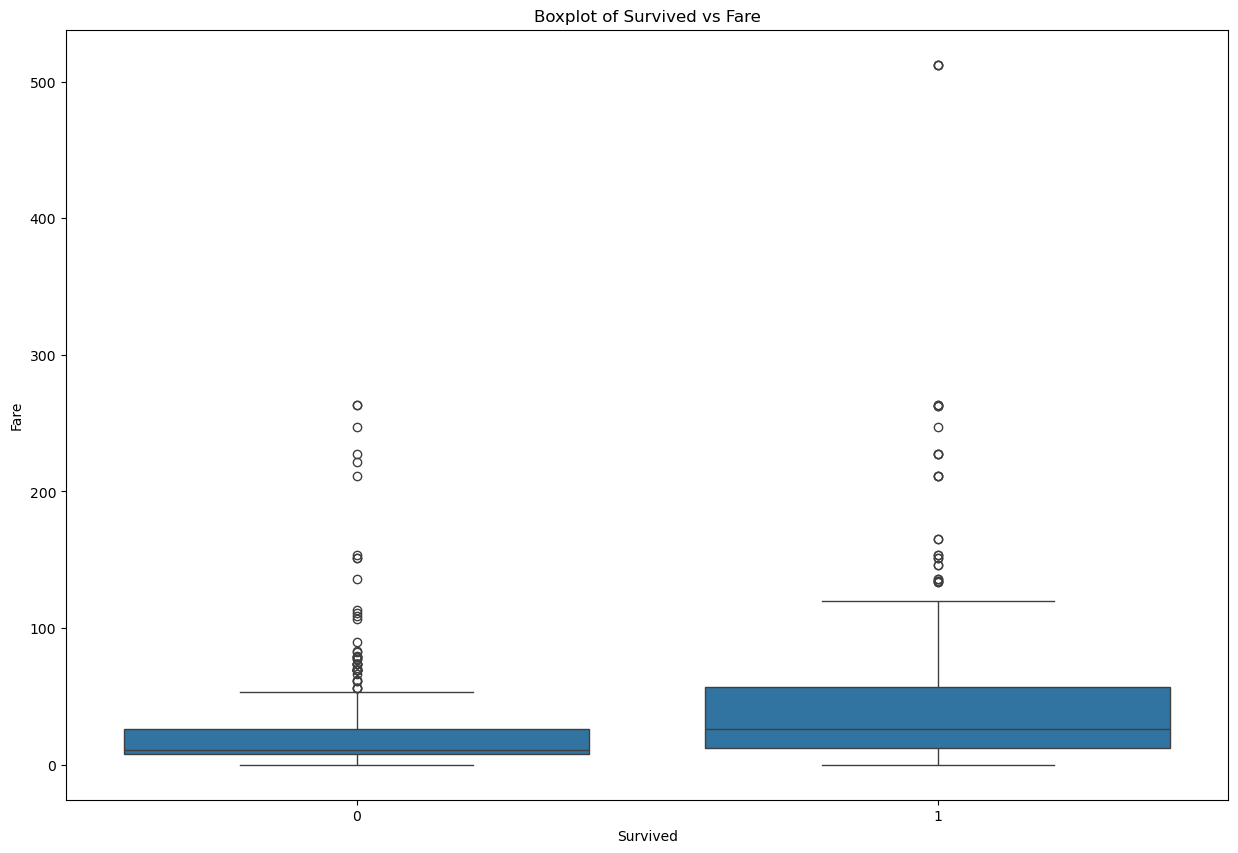

In [12]:
#boxplot
for i in numerical_cols:
    plt.figure(figsize=(15,10))
    sns.boxplot(x=target_col, y=i, data=train_df)
    plt.title(f'Boxplot of {target_col} vs {i}')
    plt.show()

<Figure size 1200x1000 with 0 Axes>

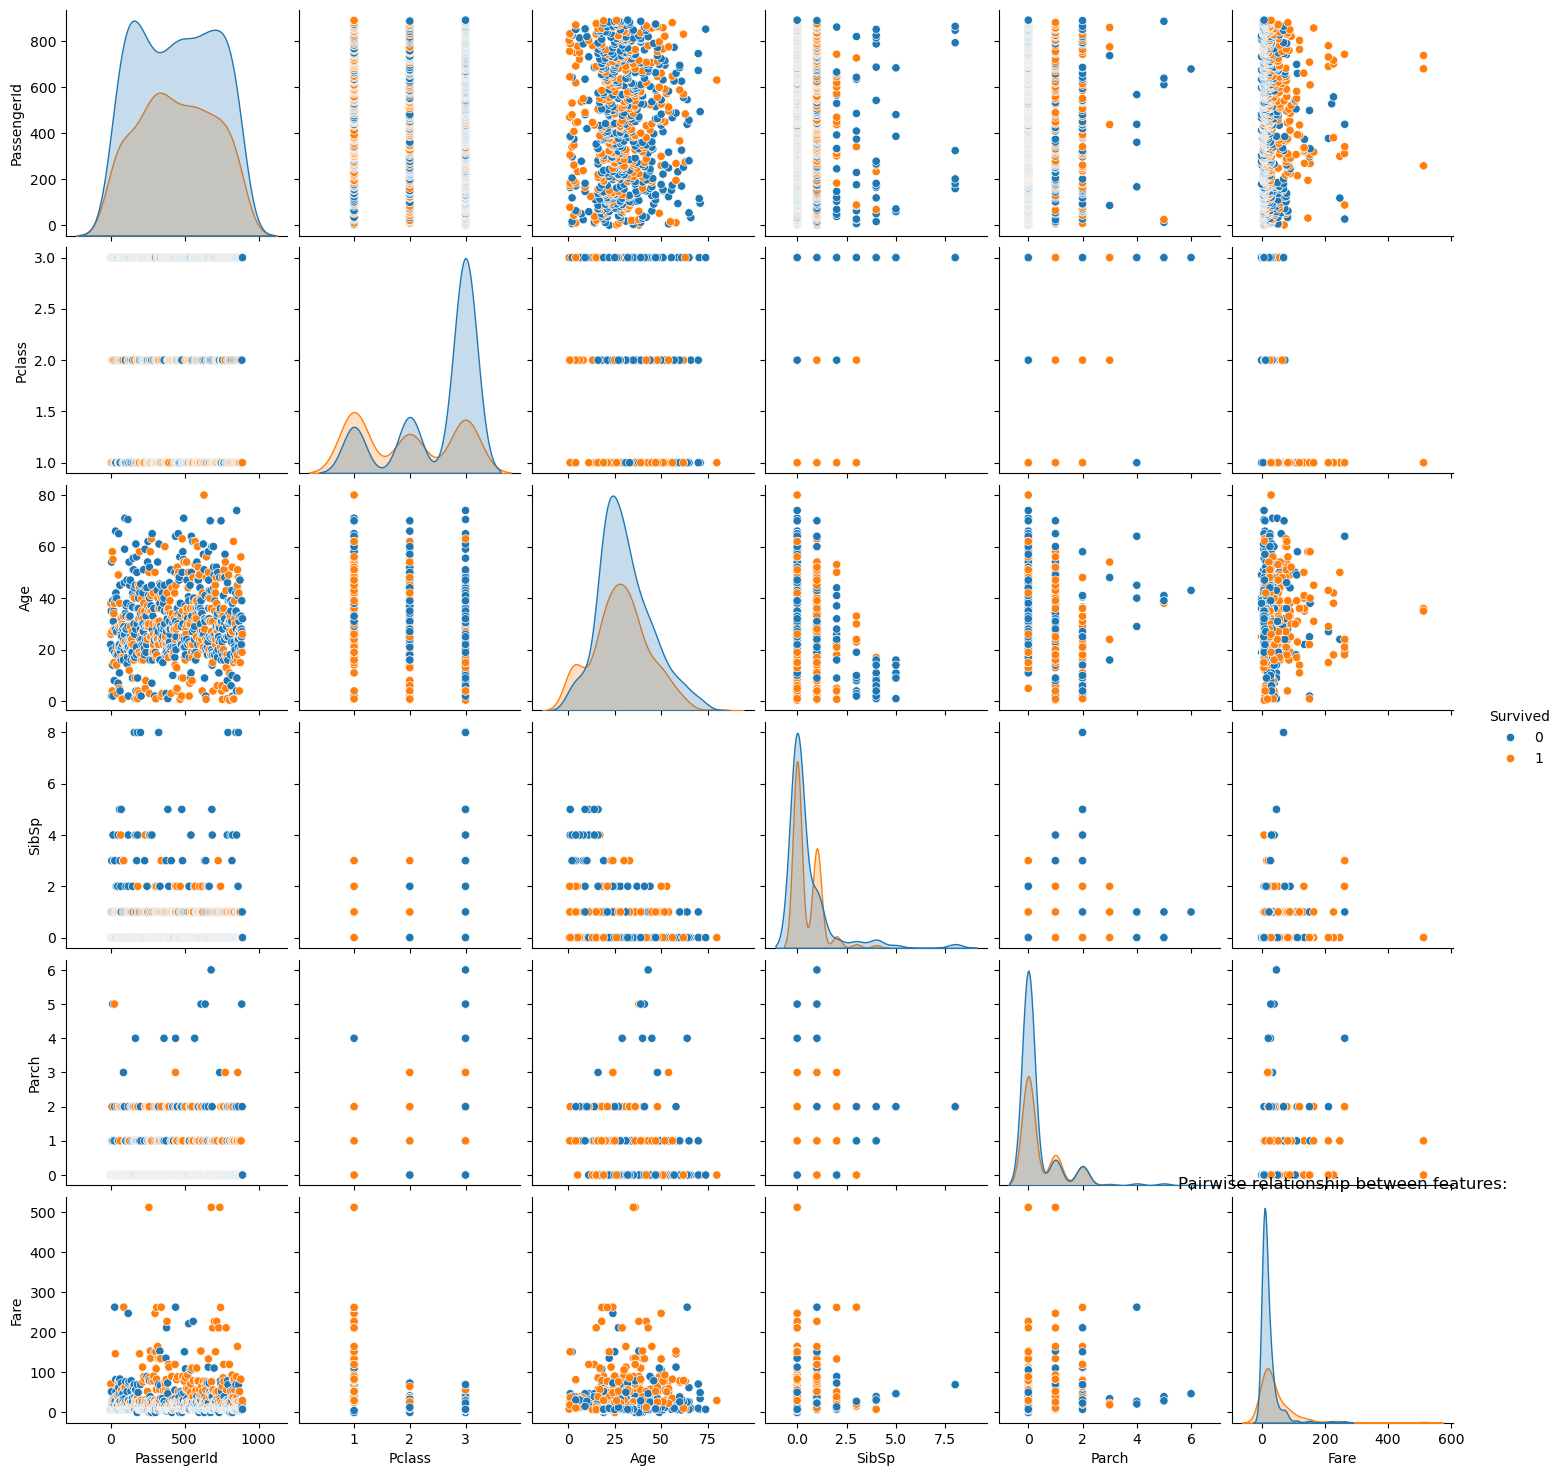

In [13]:
#Pairplot
plt.figure(figsize=(12,10))
sns.pairplot(train_df[numerical_cols], hue=target_col)
plt.title('Pairwise relationship between features:')
plt.show()



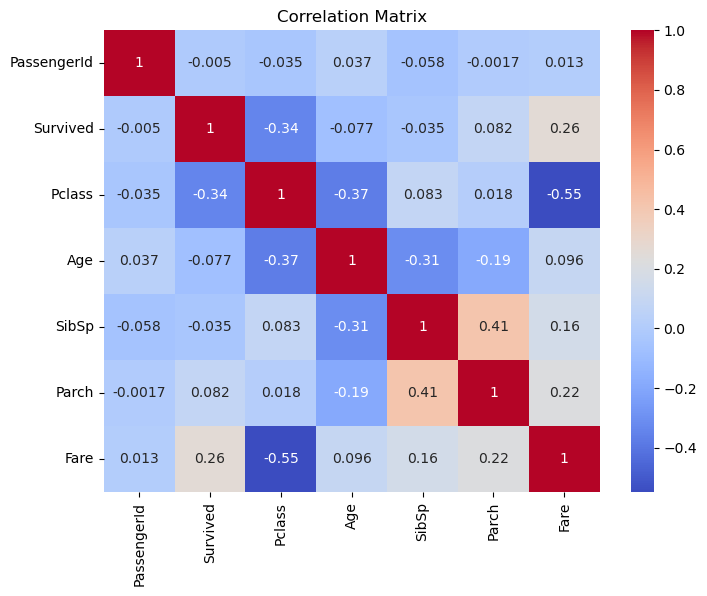

In [14]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Analysis

Histigram: Age and Fair plots are right skewed. 
Boxplot: Survived vs Sibsp has shows large outliers


# 2. Data Preprocessing

In [15]:
#Missing Values
print('Train data null values:\n',train_df.isnull().sum())
print('\nTest data null values:\n',test_df.isnull().sum())

Train data null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test data null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [16]:
#Imputation

# For Numerical columns

numerical_cols = list(numerical_cols)

if target_col in numerical_cols:
    numerical_cols.remove(target_col)
    
num_imputer=SimpleImputer(strategy='median')
train_df[numerical_cols]=num_imputer.fit_transform(train_df[numerical_cols])
test_df[numerical_cols]=num_imputer.fit_transform(test_df[numerical_cols])

#For Categorical values
cat_imputer=SimpleImputer(strategy='most_frequent')
train_df[categorical_cols]=cat_imputer.fit_transform(train_df[categorical_cols])
test_df[categorical_cols]=cat_imputer.transform(test_df[categorical_cols])


In [17]:
#One hot encoding

from sklearn.preprocessing import OneHotEncoder

#Identitying Categorical column
categorical_cols=train_df.select_dtypes(include=['object']).columns.tolist()

#Apply One-Hot Encoding
encoder=OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


# Fit on train and transform both train & test
encoded_train=pd.DataFrame(
    encoder.fit_transform(train_df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=train_df.index
)

encoded_test=pd.DataFrame(
    encoder.fit_transform(test_df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=test_df.index
)

# Drop original categorical columns and join encoded ones
train_df=train_df.drop(columns=categorical_cols).join(encoded_train)
test_df=test_df.drop(columns=categorical_cols).join(encoded_test)

#Make sure test data and train data have same values
train_df, test_df=train_df.align(test_df, join='left', axis=1, fill_value=0)

print('Categorical encoding completed')
print(train_df.shape)
print(train_df.shape)


Categorical encoding completed
(891, 1726)
(891, 1726)


In [18]:
#Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X (features) and y (target)
x=train_df.drop(columns=[target_col])
y=train_df[target_col]

# Split train_df into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val=train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)



In [19]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(train_df)
x_test_scaled=scaler.fit_transform(test_df)

In [20]:
# Create logistic regression model
log_reg=LogisticRegression(max_iter=1000, random_state=42)
#Train the model
log_reg.fit(x_train,y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.8156424581005587
Confusion Matrix:
 [[96 14]
 [19 50]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

ROC-AUC:
 0.7986824769433466
F1: 0.7518796992481203


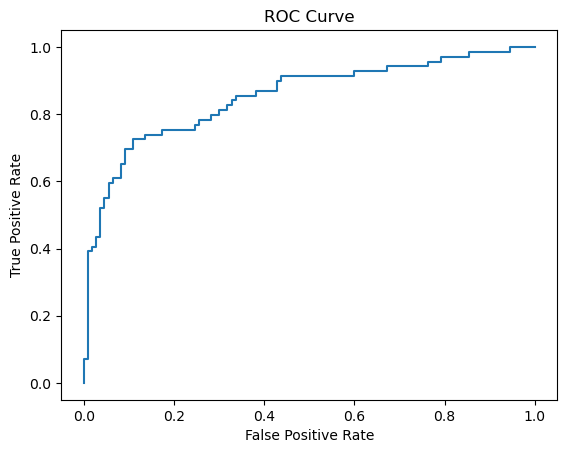

In [21]:
#Train the model
#Predict on validation data
y_pred=log_reg.predict(x_val)

#Accuracy
print('Accuracy:',accuracy_score(y_val,y_pred))

#Cofusion Matrix
print('Confusion Matrix:\n',confusion_matrix(y_val,y_pred))

#Detailed classification report
print('Classification report:\n',classification_report(y_val,y_pred))

print('ROC-AUC:\n',roc_auc_score(y_val,y_pred))
print("F1:", f1_score(y_val, y_pred))


# ROC Curve
fpr, tpr, _ = roc_curve(y_val, log_reg.predict_proba(x_val)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [22]:
#save model and scaler for streamlite

import pickle
pickle.dump(log_reg,open('logistic_model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))